In [6]:
import sys

sys.path.insert(0, '/global/common/cori/contrib/lsst/apps/anaconda/py3-envs/DESCQA/lib/python3.6/site-packages')
import GCRCatalogs
gc = GCRCatalogs.load_catalog('protoDC2')
from GCR import GCRQuery
import numpy as np
from descqa.plotting import plt
%matplotlib inline
from descqa import BaseValidationTest, TestResult

In [7]:
#get host halos
halo_data = gc.get_quantities(['hostIndex', 'hostHaloMass','is_central'],filters=['is_central'])
            

In [8]:
#check that all expected lengths match
print((halo_data['is_central']==True).sum())
print(len(halo_data['is_central']))


4041738
4041738


In [9]:
#get galaxy positions and halo infall masses for these halos
galaxy_data = gc.get_quantities(['galaxyID', 'is_central', 'hostIndex', 'infallHaloMass', 'x', 'y', 'z', 'vx', 'vy', 'vz'])

In [10]:
print(len(galaxy_data['galaxyID']))

10022496


In [11]:
print(gc.sky_area)
print(gc.cosmology)
GCRCatalogs.__version__




25.0
FlatLambdaCDM(H0=71 km / (Mpc s), Om0=0.265, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=0.0448)


'0.6.9'

(array([ 5334756.,  2159213.,  1061928.,   626125.,   379585.,   225948.,
          130037.,    68283.,    29419.,     7202.]),
 array([  1.41598999e-11,   8.94809050e-03,   1.78961810e-02,
          2.68442715e-02,   3.57923620e-02,   4.47404524e-02,
          5.36885429e-02,   6.26366334e-02,   7.15847239e-02,
          8.05328144e-02,   8.94809049e-02]),
 <a list of 10 Patch objects>)

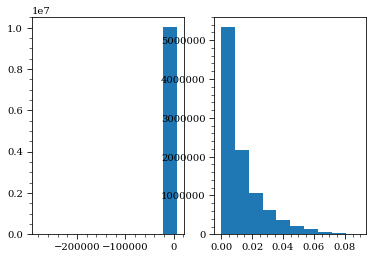

In [12]:
edata = gc.get_quantities(['ellipticity_1', 'ellipticity_2'])
fig, ax = plt.subplots(1,2)
ax[0].hist(edata['ellipticity_1'])
ax[1].hist(edata['ellipticity_2'])

(array([ 5334756.,  2159213.,  1061928.,   626125.,   379585.,   225948.,
          130037.,    68283.,    29419.,     7202.]),
 array([  1.41598999e-11,   8.94809050e-03,   1.78961810e-02,
          2.68442715e-02,   3.57923620e-02,   4.47404524e-02,
          5.36885429e-02,   6.26366334e-02,   7.15847239e-02,
          8.05328144e-02,   8.94809049e-02]),
 <a list of 10 Patch objects>)

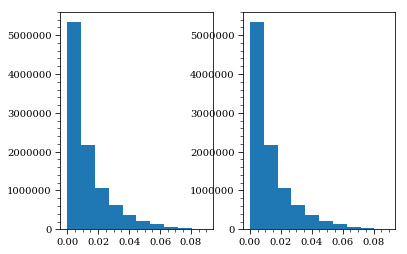

In [13]:
edata = gc.get_quantities(['morphology/totalEllipticity1','morphology/totalEllipticity2'])
fig, ax = plt.subplots(1,2)
ax[0].hist(edata['morphology/totalEllipticity1'])
ax[1].hist(edata['morphology/totalEllipticity2'])

In [16]:
dc1 = GCRCatalogs.load_catalog('dc1')
mdata = dc1.get_quantities(['stellar_mass','redshift_true'])
print(mdata.keys())
print(len(mdata['redshift_true']))

dict_keys(['redshift_true', 'stellar_mass'])
17428284


In [ ]:
mask = mdata['redshift_true']>0.2 & mdata['redshift_true']<0.3
M = mdata['stellar_mass'][mask]
Mbins = np.logspace(8., 12., 26)
N,_ = np.histogram(M, bins=Mbins)
print(N.sum())